## **CNN with MNIST Data**

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [2]:
print(tf.__version__)

2.8.0


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
# Release GPU memory to prevent memory-leaks.

from numba import cuda
device = cuda.get_current_device()
device.reset()

ImportError: Numba needs NumPy 1.20 or less

In [6]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

11501568/11490434 [==============================] - 2s 0us/step


In [8]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [11]:
# Checking the shape of one image
X_train[8].shape

(28, 28)

In [12]:
X_train[8]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
         63, 197,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [13]:
X_train[8].shape

(28, 28)

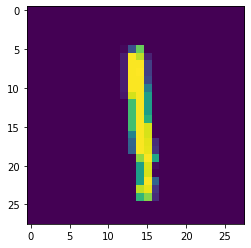

In [15]:
plt.imshow(X_train[8])
# plt.matshow(X_train[5])

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

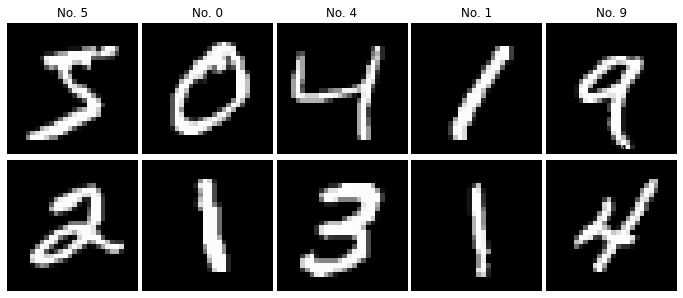

In [19]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

## Data Preprocessing

In [20]:
X_train[9].min()

0

In [21]:
X_train[9].max()

255

In [22]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [23]:
X_train[9].min()

0.0

In [24]:
X_train[9].max()

1.0

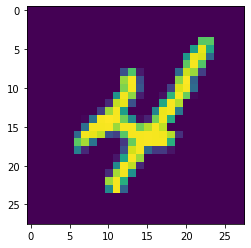

In [27]:
plt.imshow(X_train[9])

In [28]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [29]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [30]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [31]:
from tensorflow.keras.utils import to_categorical

In [32]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [37]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**A sample example showing the conversion of 3D data to 2D**
![3Dto2D](https://dphi-courses.s3.ap-south-1.amazonaws.com/Deep+Learning+Bootcamp/3D+to++2D.png)

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [42]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1498 - accuracy: 0.9552 - val_loss: 0.0574 - val_accuracy: 0.9811
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0508 - accuracy: 0.9844 - val_loss: 0.0447 - val_accuracy: 0.9848
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0326 - accuracy: 0.9897 - val_loss: 0.0388 - val_accuracy: 0.9868
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0221 - accuracy: 0.9929 - val_loss: 0.0411 - val_accuracy: 0.9867
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0155 - accuracy: 0.9950 - val_loss: 0.0423 - val_accuracy: 0.9863


In [43]:
model.metrics_names

['loss', 'accuracy']

In [44]:
model.history.history

{'loss': [0.14984871447086334,
  0.05075402185320854,
  0.03260496258735657,
  0.02210576832294464,
  0.015467132441699505],
 'accuracy': [0.9551666378974915,
  0.9843666553497314,
  0.9897333383560181,
  0.992900013923645,
  0.9949833154678345],
 'val_loss': [0.05738043040037155,
  0.044694121927022934,
  0.038785215467214584,
  0.04109184443950653,
  0.04233628883957863],
 'val_accuracy': [0.9811000227928162,
  0.9847999811172485,
  0.9868000149726868,
  0.9866999983787537,
  0.986299991607666]}

In [45]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.149849,0.955167,0.057380,0.9811
1,0.050754,0.984367,0.044694,0.9848
2,0.032605,0.989733,0.038785,0.9868
3,0.022106,0.992900,0.041092,0.9867
4,0.015467,0.994983,0.042336,0.9863


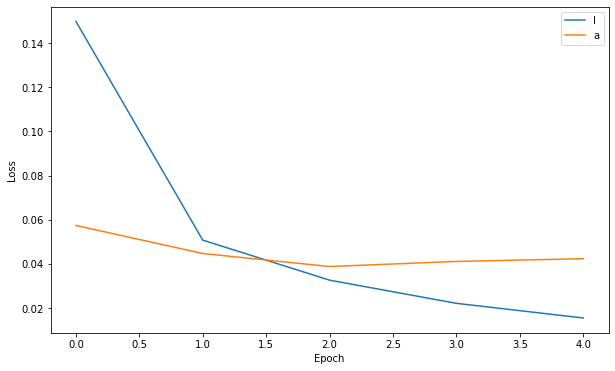

In [46]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels')

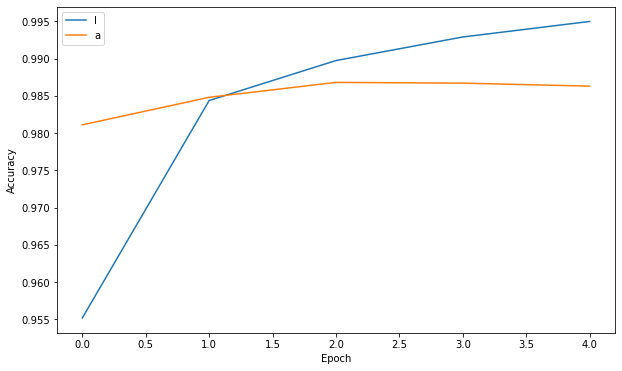

In [65]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

In [48]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 2s 5ms/step - loss: 0.0423 - accuracy: 0.9863
[0.04233628883957863, 0.986299991607666]


In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
preds = model.predict(X_test)
preds

array([[3.31452110e-09, 1.96586232e-08, 9.68901492e-09, ...,
        9.99959230e-01, 5.71394043e-09, 1.27117318e-07],
       [3.79302065e-08, 1.24317671e-06, 9.99998689e-01, ...,
        5.09308741e-12, 5.60493740e-09, 4.37615638e-10],
       [2.07118134e-07, 9.99970436e-01, 6.95778112e-07, ...,
        2.38346765e-05, 9.25298536e-07, 3.48669928e-08],
       ...,
       [9.05282996e-14, 1.07189205e-11, 2.29479699e-11, ...,
        8.97134740e-08, 1.35353659e-07, 2.02002366e-06],
       [2.02581341e-10, 1.36661897e-11, 3.77366324e-12, ...,
        4.69740857e-10, 6.87011197e-05, 8.31256175e-10],
       [2.97856080e-11, 1.49124322e-12, 3.07572773e-10, ...,
        2.95542772e-14, 2.09919016e-09, 8.33060097e-12]], dtype=float32)

In [51]:
preds[0]

array([3.3145211e-09, 1.9658623e-08, 9.6890149e-09, 4.0678977e-05,
       2.0529314e-10, 6.3567320e-09, 1.0855134e-12, 9.9995923e-01,
       5.7139404e-09, 1.2711732e-07], dtype=float32)

In [52]:
predictions= np.argmax(preds, axis=1)

In [53]:
len(predictions)

10000

In [54]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [55]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [56]:
print(confusion_matrix(y_test, predictions))

[[ 976    0    1    1    0    2    0    0    0    0]
 [   0 1132    1    1    0    0    1    0    0    0]
 [   3    3 1012    3    1    0    1    8    1    0]
 [   0    0    0 1006    0    2    0    0    2    0]
 [   0    0    0    0  976    0    1    1    0    4]
 [   1    0    0    8    0  881    2    0    0    0]
 [   5    3    0    1    2    1  944    0    2    0]
 [   1    3    4    3    0    0    0 1015    1    1]
 [   4    2    2    4    1    4    1    3  945    8]
 [   0    4    0    4    6    5    0   13    1  976]]


In [57]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04233628883957863
Test accuracy: 0.986299991607666


In [58]:
my_number = X_test[5]

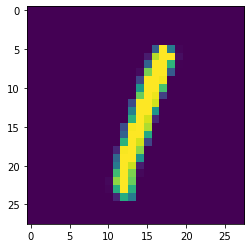

In [59]:
plt.imshow(my_number.reshape(28,28));

In [60]:
model.predict(my_number.reshape(1,28,28,1))

array([[6.6513806e-08, 9.9991202e-01, 3.6128205e-07, 2.0890403e-09,
        6.0469841e-07, 1.8756279e-09, 2.4164486e-08, 8.6110784e-05,
        7.8489290e-07, 2.2809241e-08]], dtype=float32)

In [61]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([1], dtype=int64)

In [62]:
model.save("cnn-1.h5")